In [1]:
from google.colab import files

# upload a file
upload = files.upload()

Saving Bank_Marketing_Data.csv to Bank_Marketing_Data (1).csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
bank_marketing_df = pd.read_csv('Bank_Marketing_Data.csv')
bank_marketing_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [4]:
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank_marketing_df.isna().sum()

,0
spending,0
advance_payments,0
probability_of_full_payment,0
current_balance,0
credit_limit,0
min_payment_amt,0
max_spent_in_single_shopping,0


Text(0.5, 1.0, 'Distribution of the amount spent by the customer per month (in 1000s)')

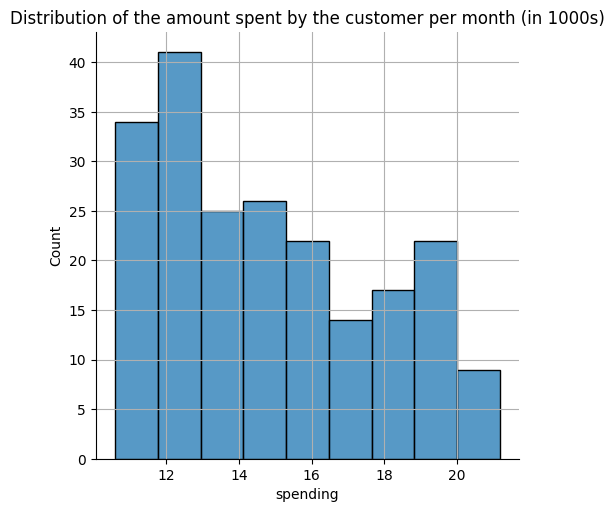

In [6]:
sns.displot(x = 'spending', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of the amount spent by the customer per month (in 1000s)')

Text(0.5, 1.0, 'Distribution of the amount paid by the customer in advance by cash (in 100s)')

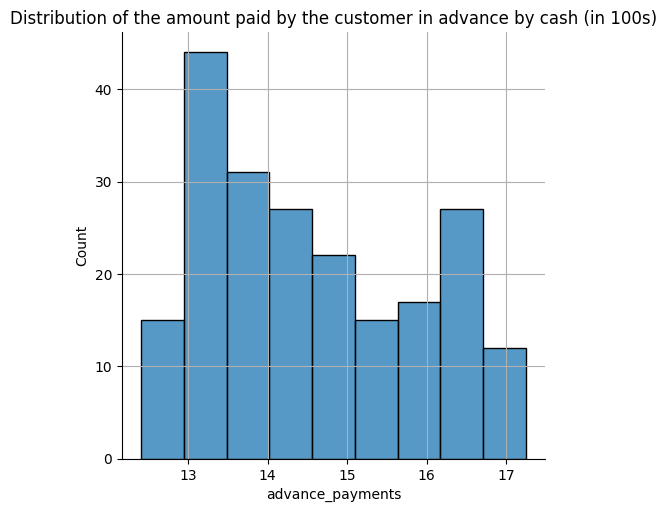

In [7]:
sns.displot(x = 'advance_payments', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of the amount paid by the customer in advance by cash (in 100s)')

Text(0.5, 1.0, 'Distribution of the probability of payment done in full by the customer to the bank')

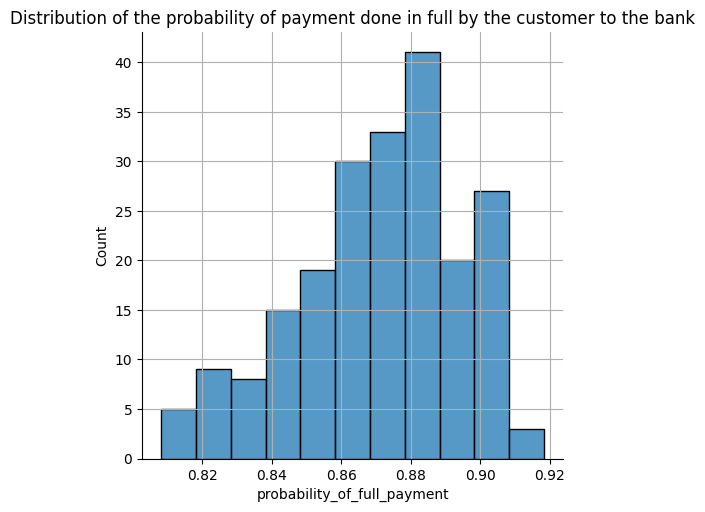

In [8]:
sns.displot(x = 'probability_of_full_payment', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of the probability of payment done in full by the customer to the bank')

Text(0.5, 1.0, 'Distribution of balance amount left in the account of the customers to make purchases (in 1000s)')

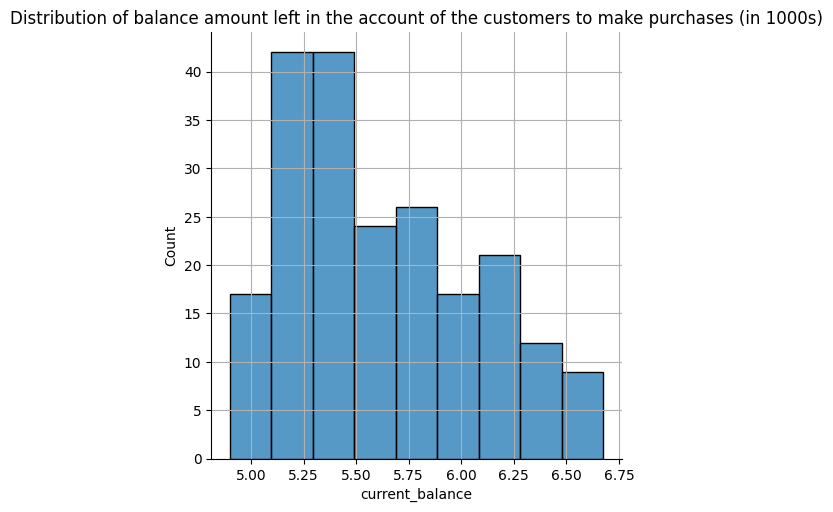

In [9]:
sns.displot(x = 'current_balance', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of balance amount left in the account of the customers to make purchases (in 1000s)')

Text(0.5, 1.0, 'Distribution of the limit of the amount in credit card (10000s)')

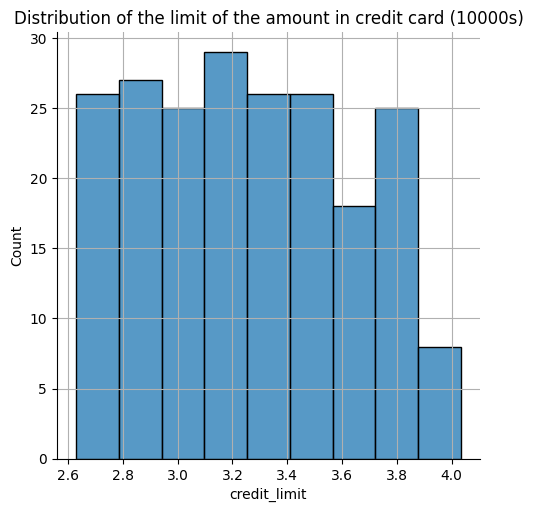

In [10]:
sns.displot(x = 'credit_limit', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of the limit of the amount in credit card (10000s)')

Text(0.5, 1.0, 'Distribution of the minimum amount paid by the customer while making payments for purchases made monthly (in 100s)')

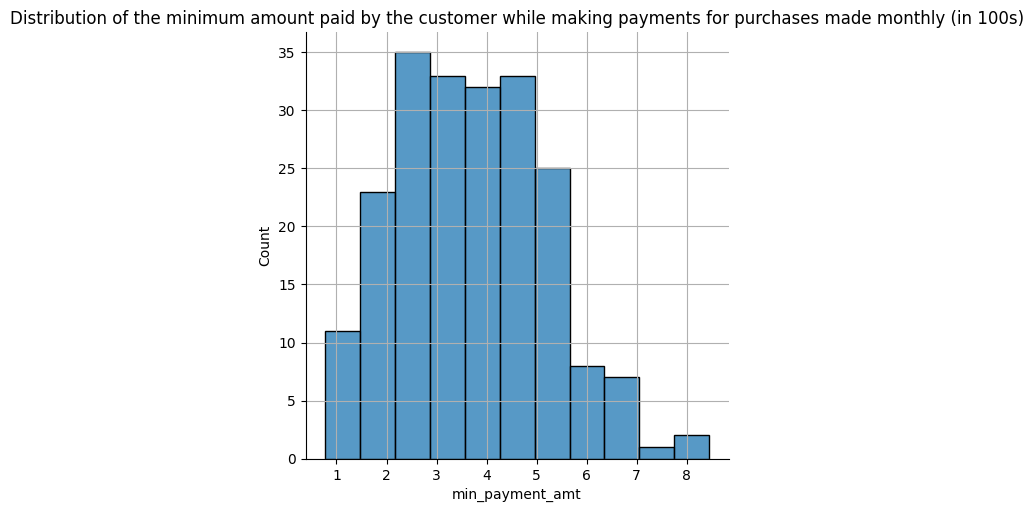

In [11]:
sns.displot(x = 'min_payment_amt', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Distribution of the minimum amount paid by the customer while making payments for purchases made monthly (in 100s)')

Text(0.5, 1.0, 'Maximum amount spent in one purchase (in 1000s) by the customer')

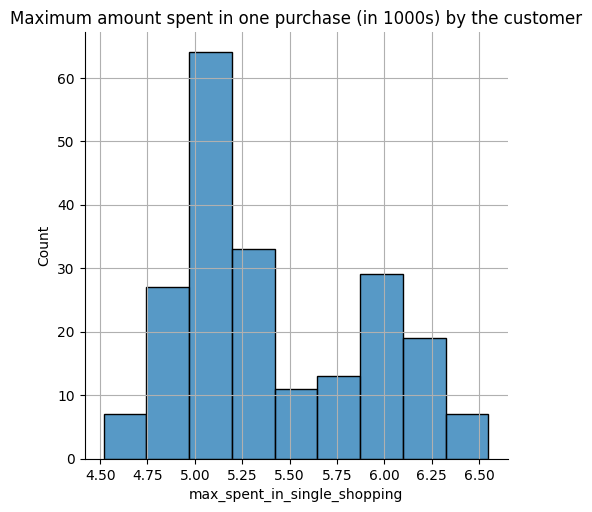

In [12]:
sns.displot(x = 'max_spent_in_single_shopping', data = bank_marketing_df, kind = 'hist')
plt.grid()
plt.title('Maximum amount spent in one purchase (in 1000s) by the customer')

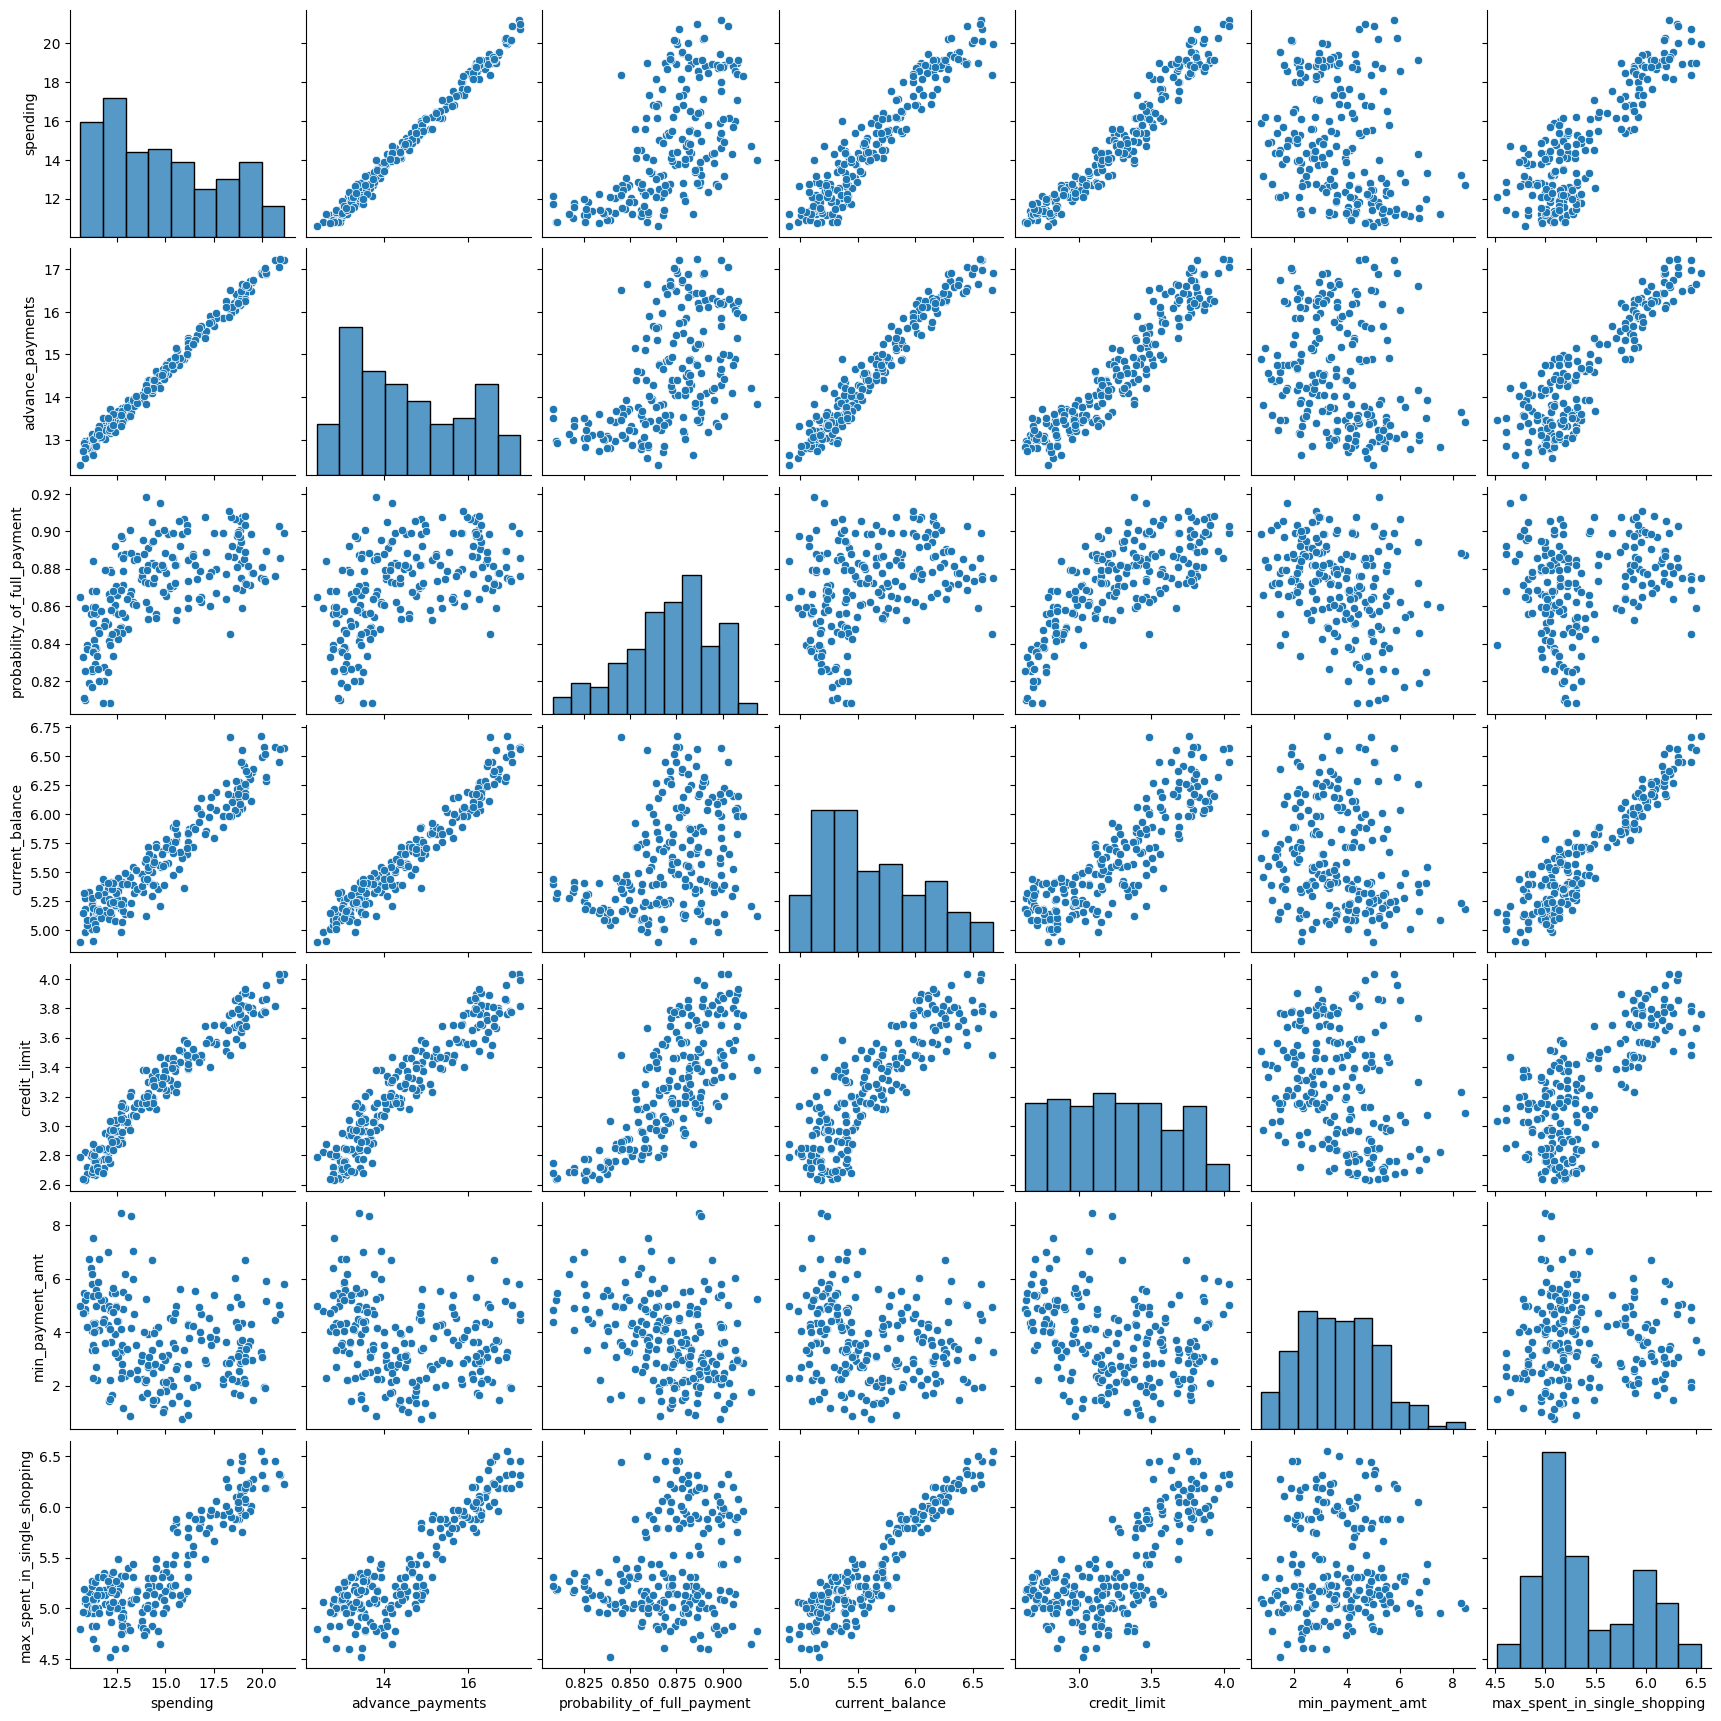

In [13]:
sns.pairplot(bank_marketing_df)

Text(0.5, 1.0, 'Box plot for every feature in bank_marketing_df')

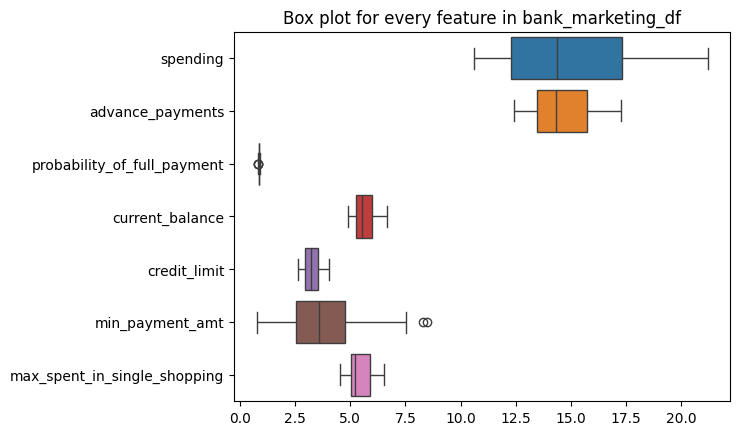

In [14]:
sns.boxplot(data = bank_marketing_df, orient = "h")
plt.title("Box plot for every feature in bank_marketing_df")

<Axes: >

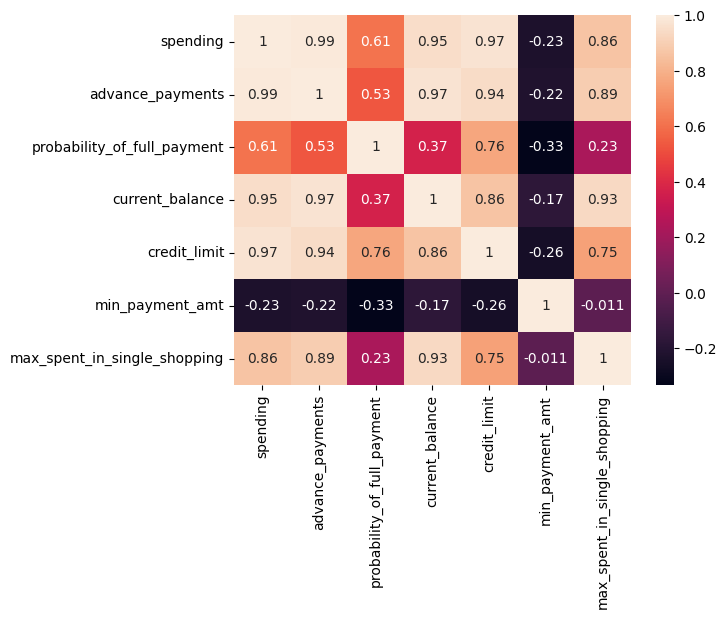

In [15]:
sns.heatmap(bank_marketing_df.corr(), annot = True)

In [16]:
wardlink = linkage(bank_marketing_df, method = 'ward')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [110.0, 110.0, 133.75, 133.75],
  [76.25, 76.25, 121.875, 121.875],
  [14.375, 14.375, 99.0625, 99.0625],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [195.0, 195.0, 220.0, 220.0],
  [172.5, 172.5, 207.5, 207.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [253.75, 253.75, 292.5, 292.5],
  [190.0, 190.0, 273.125, 273.125],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 34

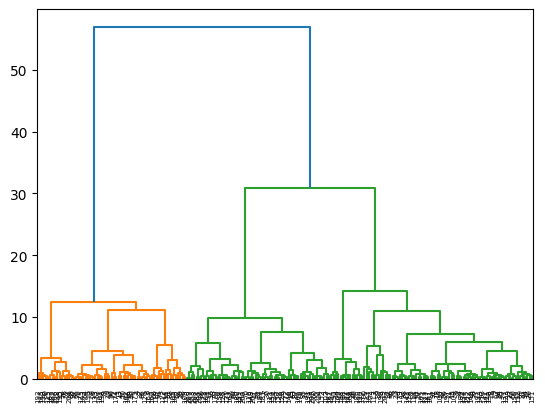

In [17]:
dend = dendrogram(wardlink)
dend

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [42.5, 42.5, 73.75, 73.75],
  [12.5, 12.5, 58.125, 58.125]],
 'dcoord': [[0.0, 11.18995160810067, 11.18995160810067, 0.0],
  [0.0, 12.374207860180004, 12.374207860180004, 11.18995160810067],
  [0.0, 7.493018036219525, 7.493018036219525, 0.0],
  [0.0, 9.900217538029384, 9.900217538029384, 7.493018036219525],
  [0.0, 7.276743030594321, 7.276743030594321, 0.0],
  [0.0, 10.919468151021213, 10.919468151021213, 7.276743030594321],
  [0.0, 14.16999768733066, 14.16999768733066, 10.919468151021213],
  [9.900217538029384,
   30.958136408094465,
   30.958136408094465,
   14.16999768733066],
  [12.374207860180004,
   56.98716091549332,
   56.98716091549332,
   30.958136408094465]],
 'ivl': ['(16)',
  '(32)',
  '(15)',
  '(25)',
  '(18)',
  '(18)',
  '(14)',
  '(12)',
  '(16)',
  '(44)'],
 'leave

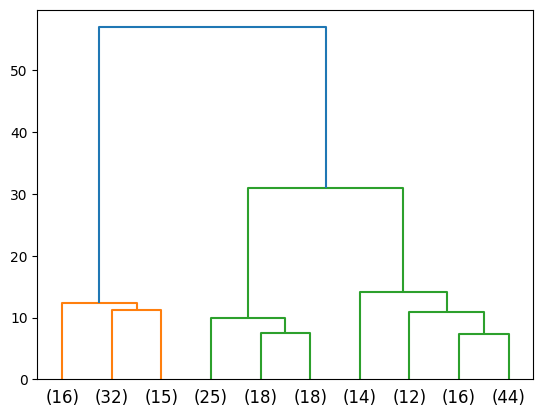

In [18]:
dend = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)
dend

In [19]:
#cluster = fcluster(wardlink, 2, criterion = 'maxclust')

In [20]:
ss = StandardScaler()

bank_marketing_scaled = ss.fit_transform(bank_marketing_df)
bank_marketing_scaled

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [21]:
wss = []

for i in range(1, bank_marketing_df.shape[1]+1):
  km = KMeans(n_clusters = i)
  km.fit(bank_marketing_scaled)
  wss.append(km.inertia_)


Text(0.5, 1.0, 'Within-Cluster Sum of Squares (WSS) plot for the each number of clusters')

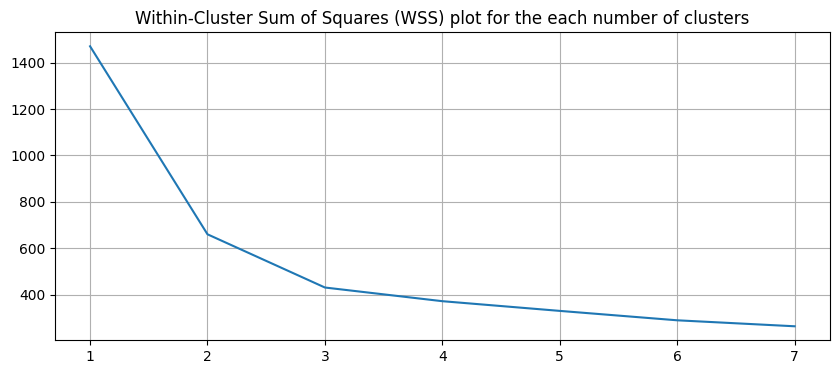

In [22]:
plt.figure(figsize = (10, 4))
plt.plot(range(1, bank_marketing_df.shape[1]+1), wss)
plt.grid()
plt.title("Within-Cluster Sum of Squares (WSS) plot for the each number of clusters")

In [23]:
km = KMeans(n_clusters = 2)
km.fit(bank_marketing_scaled)
labels = km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [24]:
sil_score = silhouette_score(bank_marketing_scaled, labels)
print('silhouette score for K-Means: ', sil_score)

silhouette score for K-Means:  0.46146579826821466


In [25]:
sil_width = silhouette_samples(bank_marketing_scaled, labels)
bank_marketing_df['sil_width'] = sil_width

In [26]:
print("max of silhoutte_samples: ",silhouette_samples(bank_marketing_scaled, labels).max())
print("min of silhoutte_samples: ",silhouette_samples(bank_marketing_scaled, labels).min())

max of silhoutte_samples:  0.666690698363018
min of silhoutte_samples:  -0.0055167389402923424


In [27]:
bank_marketing_df["cluster"] = labels
bank_marketing_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0.591310,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0.018179,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0.666691,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0.501388,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0.550524,1
...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0.444497,0
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,0.379538,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,0.385403,0
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,0.236341,1


Text(0.5, 1.0, 'Distribution of the amount spent by the customer per month (in 1000s)')

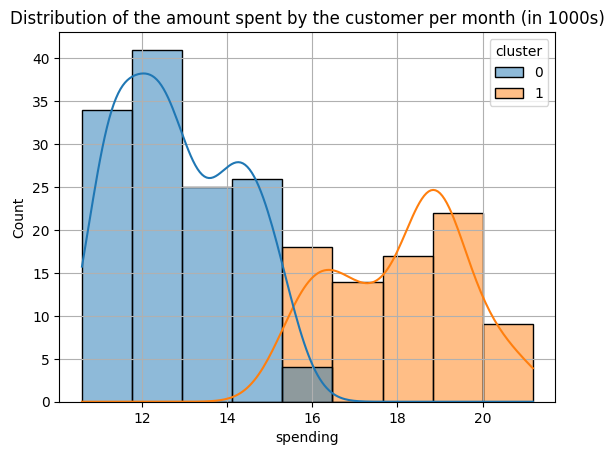

In [28]:
sns.histplot(x = 'spending', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of the amount spent by the customer per month (in 1000s)')

Text(0.5, 1.0, 'Distribution of the amount paid by the customer in advance by cash (in 100s)')

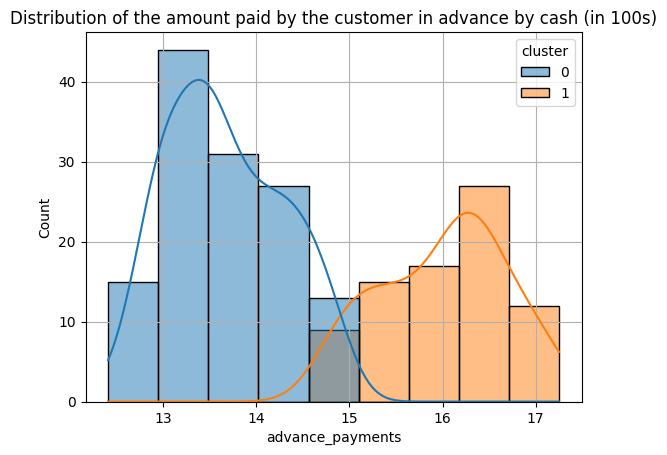

In [29]:
sns.histplot(x = 'advance_payments', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of the amount paid by the customer in advance by cash (in 100s)')

Text(0.5, 1.0, 'Distribution of the probability of payment done in full by the customer to the bank')

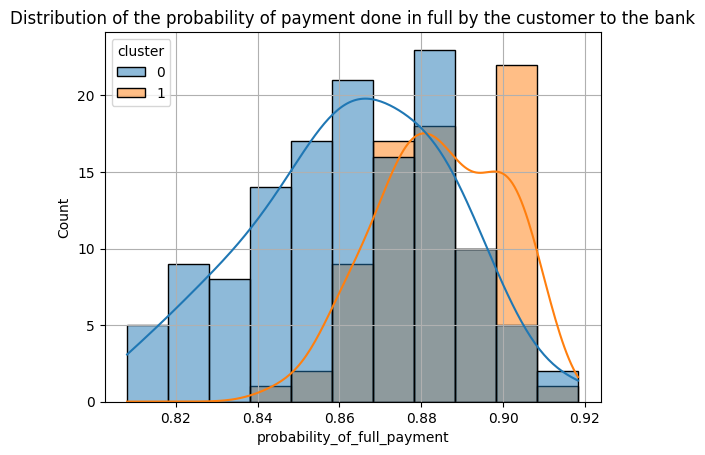

In [30]:
sns.histplot(x = 'probability_of_full_payment', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of the probability of payment done in full by the customer to the bank')

Text(0.5, 1.0, 'Distribution of balance amount left in the account of the customers to make purchases (in 1000s)')

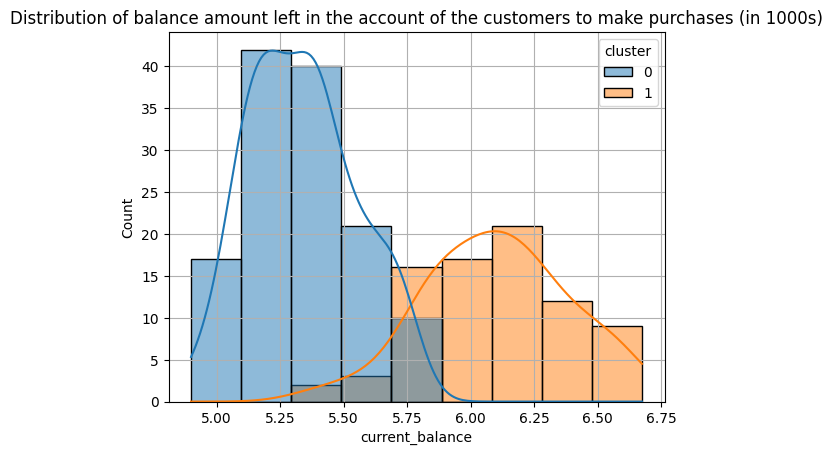

In [31]:
sns.histplot(x = 'current_balance', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of balance amount left in the account of the customers to make purchases (in 1000s)')

Text(0.5, 1.0, 'Distribution of the limit of the amount in credit card (10000s)')

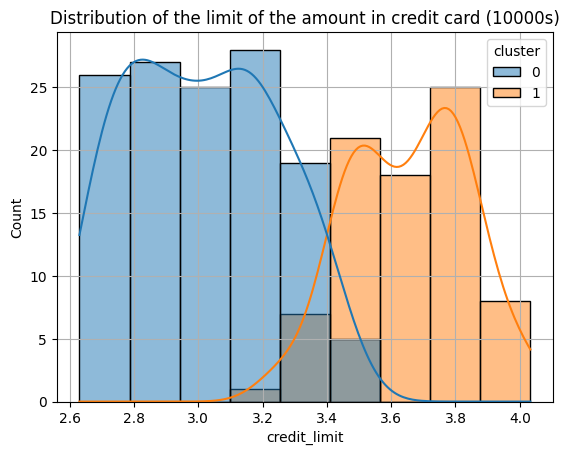

In [32]:
sns.histplot(x = 'credit_limit', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of the limit of the amount in credit card (10000s)')

Text(0.5, 1.0, 'Distribution of the minimum amount paid by the customer while making payments for purchases made monthly (in 100s)')

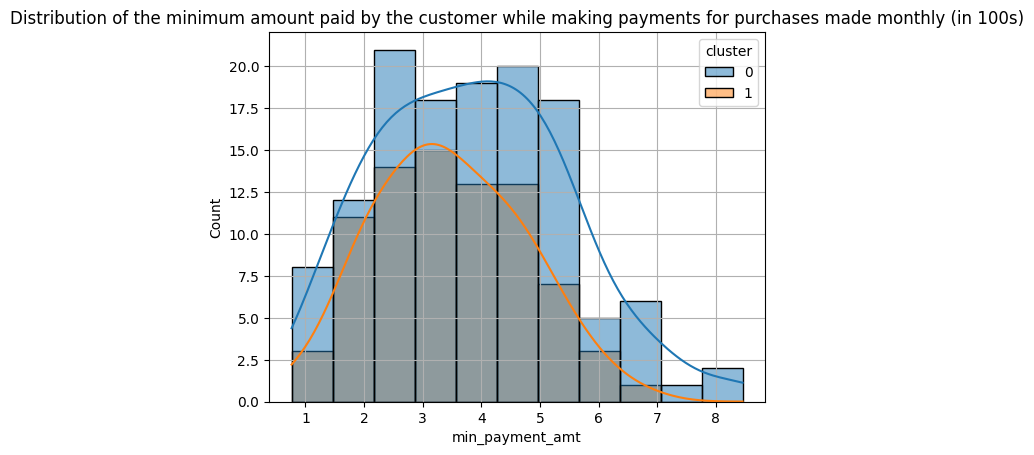

In [33]:
sns.histplot(x = 'min_payment_amt', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Distribution of the minimum amount paid by the customer while making payments for purchases made monthly (in 100s)')

Text(0.5, 1.0, 'Maximum amount spent in one purchase (in 1000s) by the customer')

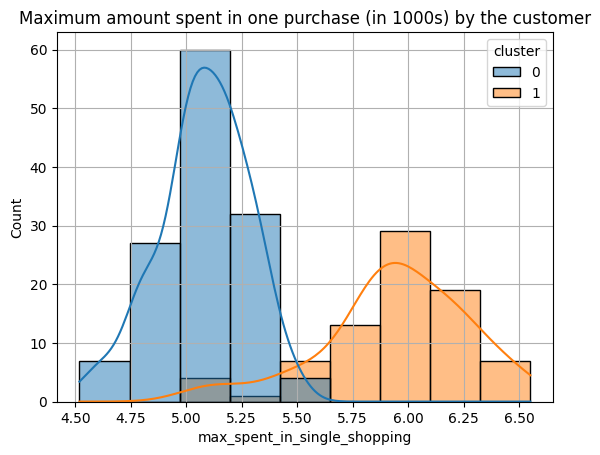

In [34]:
sns.histplot(x = 'max_spent_in_single_shopping', data = bank_marketing_df, kde = True, hue = 'cluster')
plt.grid()
plt.title('Maximum amount spent in one purchase (in 1000s) by the customer')